<a href="https://colab.research.google.com/github/meghna-kannan/gwc-billboard-music/blob/main/Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/GWC-DCMB/CapstoneProject/master/datasets/"
billboard_singles = pd.read_csv(url + "music_billboard_hot_100/hot_stuff_2.csv")
audio_features = pd.read_csv(url + "music_billboard_hot_100/hot_100_audio_features.csv")
df = pd.read_csv(url + "music_billboard_hot_100/hot_stuff_2.csv")
df.tail()


,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart
317790,http://www.billboard.com/charts/hot-100/1960-0...,1960-07-02,6,That's All You Gotta Do,Brenda Lee,That's All You Gotta DoBrenda Lee,1,17.0,6,5
317791,http://www.billboard.com/charts/hot-100/1968-0...,1968-02-24,6,Simon Says,1910 Fruitgum Co.,Simon Says1910 Fruitgum Co.,1,17.0,6,5
317792,http://www.billboard.com/charts/hot-100/1971-0...,1971-03-06,6,She's A Lady,Tom Jones,She's A LadyTom Jones,1,17.0,6,5
317793,http://www.billboard.com/charts/hot-100/1979-0...,1979-06-09,6,Ring My Bell,Anita Ward,Ring My BellAnita Ward,1,19.0,6,5
317794,http://www.billboard.com/charts/hot-100/1967-0...,1967-06-24,6,San Francisco (Be Sure To Wear Flowers In Your...,Scott McKenzie,San Francisco (Be Sure To Wear Flowers In Your...,1,20.0,6,5


In [ ]:
most_weeks = max(billboard_singles['weeks_on_chart'])
print(most_weeks)

87


In [ ]:
billboard_singles.sort_values('weeks_on_chart', ascending = False)

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart
229987,http://www.billboard.com/charts/hot-100/2014-0...,2014-05-10,49,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,48.0,3,87
229986,http://www.billboard.com/charts/hot-100/2014-0...,2014-05-03,48,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,42.0,3,86
229985,http://www.billboard.com/charts/hot-100/2014-0...,2014-04-26,42,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,39.0,3,85
229984,http://www.billboard.com/charts/hot-100/2014-0...,2014-04-19,39,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,37.0,3,84
229983,http://www.billboard.com/charts/hot-100/2014-0...,2014-04-12,37,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,33.0,3,83
...,...,...,...,...,...,...,...,...,...,...
48405,http://www.billboard.com/charts/hot-100/2010-1...,2010-10-16,74,Right Thru Me,Nicki Minaj,Right Thru MeNicki Minaj,1,NaN,74,1
48404,http://www.billboard.com/charts/hot-100/2010-1...,2010-10-02,74,Can't Be Friends,Trey Songz,Can't Be FriendsTrey Songz,1,NaN,74,1
48403,http://www.billboard.com/charts/hot-100/2010-0...,2010-03-20,74,Cryin' Like A Bitch!,Godsmack,Cryin' Like A Bitch!Godsmack,1,NaN,74,1
48402,http://www.billboard.com/charts/hot-100/2009-0...,2009-09-12,74,Paparazzi,Lady Gaga,PaparazziLady Gaga,1,NaN,74,1


In [ ]:
at_one = billboard_singles.query('week_position == 1')
at_one.sort_values('weeks_on_chart', ascending = False)
at_one_longest = max(at_one['weeks_on_chart'])
print(at_one_longest)

46


In [ ]:
len(set(df.weekid))

3178

In [ ]:
audio_features.head()
audio_features.tail()

,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
28085,Theme For Young LoversPercy Faith And His Orch...,4J3TFS9AhLYk670Lq75qvk,"['adult standards', 'easy listening', 'lounge']",157160.0,30.0,0.346,0.3720,9.0,-13.811,True,0.0341,0.761,0.9190,0.1220,0.1920,108.189,4.0
28086,"Theme From ""A Summer Place""The Lettermen",1gKeImq3kiRBn8yEyQncQP,"['adult standards', 'brill building pop', 'bub...",125200.0,42.0,0.434,0.2960,8.0,-15.614,True,0.0323,0.827,0.0000,0.1350,0.3520,96.276,3.0
28087,"Theme From ""A Summer Place""The Ventures",28rEzQX1KickP9tCYZ3q1a,"['rock-and-roll', 'rockabilly', 'surf music']",138560.0,28.0,0.650,0.3610,5.0,-13.277,True,0.0306,0.630,0.0799,0.0536,0.9480,99.236,3.0
28088,"Theme From ""Close Encounters Of The Third Kind...",4lYhgiFkYc1k6W3LdO4B7x,['soundtrack'],499693.0,0.0,0.344,0.0627,7.0,-22.933,True,0.0327,0.988,0.8530,0.2610,0.0364,95.993,4.0
28089,"Theme From ""Greatest American Hero"" (Believe I...",375ntCG12wzCyfzclwYFwG,"['soft rock', 'yacht rock']",195293.0,53.0,0.521,0.7430,2.0,-5.903,True,0.0338,0.249,0.0000,0.0960,0.4510,117.129,4.0


In [ ]:
audio_features.tail()


,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
28085,Theme For Young LoversPercy Faith And His Orch...,4J3TFS9AhLYk670Lq75qvk,"['adult standards', 'easy listening', 'lounge']",157160.0,30.0,0.346,0.3720,9.0,-13.811,True,0.0341,0.761,0.9190,0.1220,0.1920,108.189,4.0
28086,"Theme From ""A Summer Place""The Lettermen",1gKeImq3kiRBn8yEyQncQP,"['adult standards', 'brill building pop', 'bub...",125200.0,42.0,0.434,0.2960,8.0,-15.614,True,0.0323,0.827,0.0000,0.1350,0.3520,96.276,3.0
28087,"Theme From ""A Summer Place""The Ventures",28rEzQX1KickP9tCYZ3q1a,"['rock-and-roll', 'rockabilly', 'surf music']",138560.0,28.0,0.650,0.3610,5.0,-13.277,True,0.0306,0.630,0.0799,0.0536,0.9480,99.236,3.0
28088,"Theme From ""Close Encounters Of The Third Kind...",4lYhgiFkYc1k6W3LdO4B7x,['soundtrack'],499693.0,0.0,0.344,0.0627,7.0,-22.933,True,0.0327,0.988,0.8530,0.2610,0.0364,95.993,4.0
28089,"Theme From ""Greatest American Hero"" (Believe I...",375ntCG12wzCyfzclwYFwG,"['soft rock', 'yacht rock']",195293.0,53.0,0.521,0.7430,2.0,-5.903,True,0.0338,0.249,0.0000,0.0960,0.4510,117.129,4.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
unique_genres = audio_features['artist_genre'].unique()
print(unique_genres)
len(unique_genres)

["['brill building pop', 'classic girl group', 'classic soul', 'disco', 'funk', 'motown', 'quiet storm', 'soul', 'southern soul']"
 "['adult standards', 'folk', 'folk rock', 'folk-pop', 'mellow gold', 'rock', 'roots rock', 'singer-songwriter', 'soft rock']"
 "['g funk', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'west coast rap']"
 ...
 "['alternative metal', 'alternative rock', 'el paso indie', 'garage rock', 'modern rock', 'rock']"
 "['classic uk pop', 'german rock']" "['soundtrack']"]


3258

What song jumped the most places upwards in one week? How about for places downward?

Which genre has the most songs featured on the chart?

What song was on the chart the longest?

Do seasons affect what type of music people listen to?

What traits (danceability, energy, etc) contribute to song popularity the most?

Which artist has the most songs or most weeks on the chart?

hypotheses:
Songs that are happy or energetic are most popular.
Songs that are 3-5 minutes long are most common (or popular).

In [ ]:
at_one = merged_data.query('week_position == 1')
at_one.sort_values('weeks_on_chart', ascending = False)
at_one_longest = max(at_one['weeks_on_chart'])
print(at_one_longest)

NameError: name 'merged_data' is not defined



*   What was on the billboard longest? - Overall and at number 1? Radioactive by Imagine Dragons was on the chart for the longest. (need to recheck this)
*   How many rows? 317794
*   For later - missing data
*   Ranges from 1955 to 2019
*   How many different weeks are there? 3178
* What is the "instance" column? is it the number of times/weeks it was on the chart?
* Are there songs with the same name? there are unique IDs so this will not be a problem
* Are there multiple songs from the same performer? Which performers have the most songs? yes there are multiple songs from the same performer.
* What song rose the most quickly on the chart - most places jumped in one week? Same for decline
* What traits (danceability, energy, etc) impacts song popularity the most?
* How are the data sets ordered?
* When do the most changes happen?
* How many of them are about a certain topic? What topic?
---such as breakups, love, regrets
* What is the average number of weeks a song stays on the billboard?
* Hypothesis for Spotify: People listen to happy, energetic music more. People listen to more songs with a duration of 3 to 5 minutes.
* Hypothesis for Music Billboard: The variation of music on the billboard increased overtime because people had access to more music.
* Do the genres people listen to change depending on time of year? For example more Christmas music during the winter.
---divide into 4 groups of 3 months

spring: march, april, may
summer: june, july august
autumn: september, october, november??
winter: december january, february??
notable seasons/holidays that may affect music popularity:
christmas, valentine's day,

In [ ]:
merged_data = pd.merge(billboard_singles, audio_features, how = 'inner', on = "songid")

In [ ]:
merged_data.head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,http://www.billboard.com/charts/hot-100/2013-0...,2013-08-31,6,Applause,Lady Gaga,ApplauseLady Gaga,1,NaN,6,1,...,7.0,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0
1,http://www.billboard.com/charts/hot-100/2013-1...,2013-10-19,9,Applause,Lady Gaga,ApplauseLady Gaga,1,9.0,4,8,...,7.0,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0
2,http://www.billboard.com/charts/hot-100/2013-1...,2013-11-16,10,Applause,Lady Gaga,ApplauseLady Gaga,1,7.0,4,12,...,7.0,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0
3,http://www.billboard.com/charts/hot-100/2013-1...,2013-11-23,10,Applause,Lady Gaga,ApplauseLady Gaga,1,10.0,4,13,...,7.0,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0
4,http://www.billboard.com/charts/hot-100/2013-1...,2013-11-30,9,Applause,Lady Gaga,ApplauseLady Gaga,1,10.0,4,14,...,7.0,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0


In [ ]:
merged_data.tail()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
315698,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-03,32,Tonight's The Night,Solomon Burke,Tonight's The NightSolomon Burke,1,42.0,32,6,...,7.0,-9.534,True,0.029,0.401,0.0,0.6,0.633,173.305,3.0
315699,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-10,29,Tonight's The Night,Solomon Burke,Tonight's The NightSolomon Burke,1,32.0,29,7,...,7.0,-9.534,True,0.029,0.401,0.0,0.6,0.633,173.305,3.0
315700,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-17,28,Tonight's The Night,Solomon Burke,Tonight's The NightSolomon Burke,1,29.0,28,8,...,7.0,-9.534,True,0.029,0.401,0.0,0.6,0.633,173.305,3.0
315701,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-24,32,Tonight's The Night,Solomon Burke,Tonight's The NightSolomon Burke,1,28.0,28,9,...,7.0,-9.534,True,0.029,0.401,0.0,0.6,0.633,173.305,3.0
315702,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-31,37,Tonight's The Night,Solomon Burke,Tonight's The NightSolomon Burke,1,32.0,28,10,...,7.0,-9.534,True,0.029,0.401,0.0,0.6,0.633,173.305,3.0


In [ ]:
merged_data.dtypes

url                           object
weekid                        object
week_position                  int64
song                          object
performer                     object
songid                        object
instance                       int64
previous_week_position       float64
peak_position                  int64
weeks_on_chart                 int64
spotify_track_id              object
artist_genre                  object
spotify_track_duration_ms    float64
spotify_track_popularity     float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                          object
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
dtype: object

In [ ]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the substrings in the string, using sep as the separator string.
    
      sep
        The separator used to split the string.
    
        When set to None (the default value), will split on any whitespace
        character (including \\n \\r \\t \\f and spaces) and will discard
        empty strings from the result.
      maxsplit
        Maximum number of splits (starting from the left).
        -1 (the default value) means no limit.
    
    Note, str.split() is mainly useful for data that has been intentionally
    delimited.  With natural text that includes punctuation, consider using
    the regular expression module.



In [ ]:
merged_data['weekid'][0].split("-",1)

['2013', '08-31']

In [ ]:

# merged_data['weekid'].apply(str.split, args=("-",1))
def extract_year(weekid):
  return weekid.split("-",1)[0]

extract_year("2013-08-31")
merged_data['weekid'].apply(extract_year)

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
315698    1965
315699    1965
315700    1965
315701    1965
315702    1965
Name: weekid, Length: 315703, dtype: object

In [ ]:
merged_data['year']=merged_data['weekid'].apply(extract_year)
merged_data.head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,http://www.billboard.com/charts/hot-100/2013-0...,2013-08-31,6,Applause,Lady Gaga,ApplauseLady Gaga,1,NaN,6,1,...,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0,2013
1,http://www.billboard.com/charts/hot-100/2013-1...,2013-10-19,9,Applause,Lady Gaga,ApplauseLady Gaga,1,9.0,4,8,...,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0,2013
2,http://www.billboard.com/charts/hot-100/2013-1...,2013-11-16,10,Applause,Lady Gaga,ApplauseLady Gaga,1,7.0,4,12,...,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0,2013
3,http://www.billboard.com/charts/hot-100/2013-1...,2013-11-23,10,Applause,Lady Gaga,ApplauseLady Gaga,1,10.0,4,13,...,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0,2013
4,http://www.billboard.com/charts/hot-100/2013-1...,2013-11-30,9,Applause,Lady Gaga,ApplauseLady Gaga,1,10.0,4,14,...,-4.287,False,0.053,0.0265,0.000002,0.143,0.738,139.945,4.0,2013


In [ ]:
merged_data.year

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
315698    1965
315699    1965
315700    1965
315701    1965
315702    1965
Name: year, Length: 315703, dtype: object

In [ ]:
from scipy.stats import pearsonr

pearsonr(merged_data_cleaned['danceability'],merged_data_cleaned['peak_position'])

PearsonRResult(statistic=-0.07314604583693511, pvalue=4.031473628555992e-277)

In [ ]:
from scipy.stats import pearsonr

pearsonr(merged_data_cleaned['spotify_track_duration_ms'],merged_data_cleaned['spotify_track_duration_ms'])

PearsonRResult(statistic=0.9999999999999972, pvalue=0.0)

In [ ]:
merged_data.shape

(315703, 27)

In [ ]:
merged_data_cleaned.shape


(235849, 27)

In [ ]:

df = pd.DataFrame(merged_data)
merged_data_cleaned = merged_data.dropna()

print(merged_data_cleaned)


                                                      url      weekid  \
1       http://www.billboard.com/charts/hot-100/2013-1...  2013-10-19   
2       http://www.billboard.com/charts/hot-100/2013-1...  2013-11-16   
3       http://www.billboard.com/charts/hot-100/2013-1...  2013-11-23   
4       http://www.billboard.com/charts/hot-100/2013-1...  2013-11-30   
5       http://www.billboard.com/charts/hot-100/2013-1...  2013-12-07   
...                                                   ...         ...   
315698  http://www.billboard.com/charts/hot-100/1965-0...  1965-07-03   
315699  http://www.billboard.com/charts/hot-100/1965-0...  1965-07-10   
315700  http://www.billboard.com/charts/hot-100/1965-0...  1965-07-17   
315701  http://www.billboard.com/charts/hot-100/1965-0...  1965-07-24   
315702  http://www.billboard.com/charts/hot-100/1965-0...  1965-07-31   

        week_position                 song      performer  \
1                   9             Applause      Lady Gaga   
2

In [ ]:
merged_data['danceability'].corr(merged_data['peak_position'])

-0.07583155173326218

In [ ]:
sns.scatterplot(x = "duration",y = "weeks_on_chart", data=merged_data[merged_data['year'].isin(["2019"])])
merged_data['duration'].corr(merged_data['weeks_on_chart'])

ValueError: Could not interpret value `duration` for `x`. An entry with this name does not appear in `data`.

-0.04806929338493011

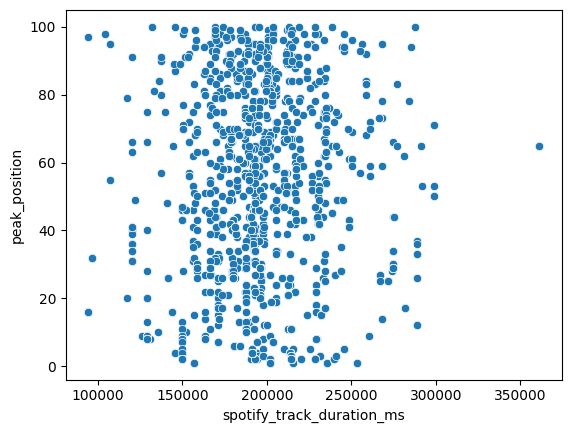

In [ ]:
sns.scatterplot(x = "spotify_track_duration_ms",y = "peak_position", data=merged_data[merged_data['year'].isin(["2019"])])
merged_data['spotify_track_duration_ms'].corr(merged_data['peak_position'])

<Axes: xlabel='danceability', ylabel='peak_position'>

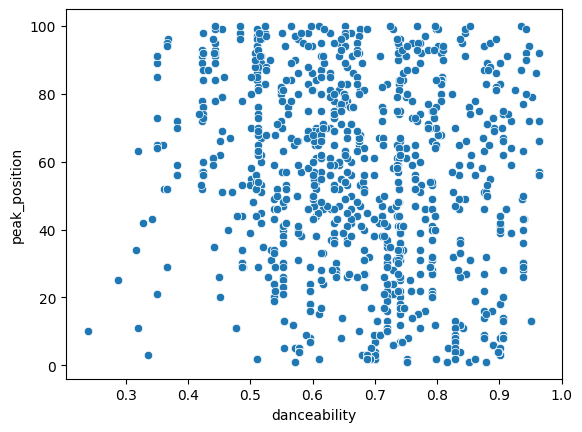

In [ ]:

#can use this format for other traits or other years
sns.scatterplot(x = "danceability",y = "peak_position", data=merged_data[merged_data['year'].isin(["2019"])])

<Axes: xlabel='danceability', ylabel='weeks_on_chart'>

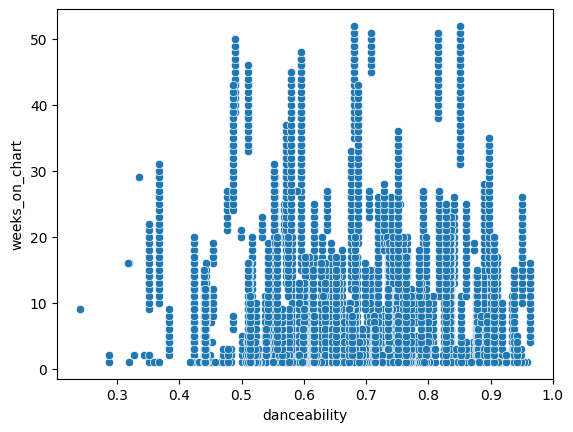

In [ ]:
sns.scatterplot(x = "danceability",y = "weeks_on_chart", data=merged_data[merged_data['year'].isin(["2019"])])

0.007025206531997922

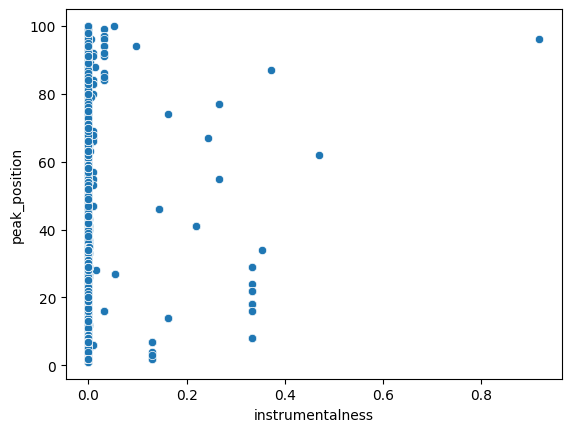

In [ ]:
sns.scatterplot(x = "instrumentalness",y = "peak_position", data=merged_data[merged_data['year'].isin(["2019"])])
merged_data['energy'].corr(merged_data['peak_position'])

<Axes: xlabel='tempo', ylabel='peak_position'>

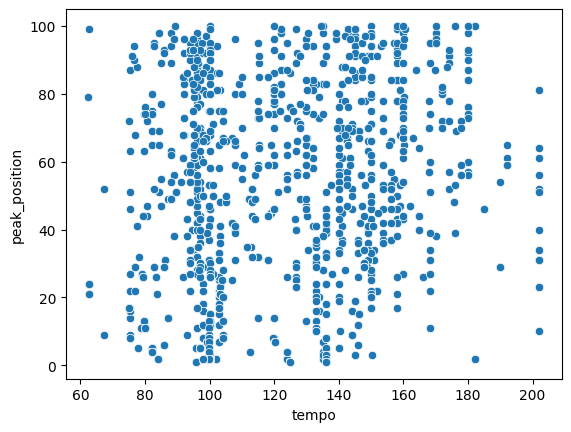

In [ ]:
sns.scatterplot(x = "tempo",y = "peak_position", data=merged_data[merged_data['year'].isin(["2019"])])


<Axes: xlabel='speechiness', ylabel='weeks_on_chart'>

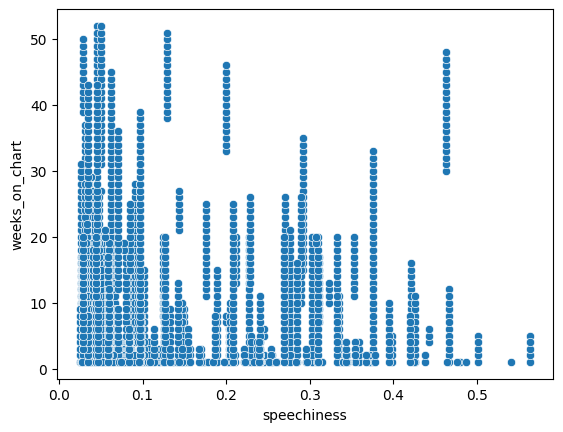

In [ ]:
#1985 was interesting if we feel like fishing
sns.scatterplot(x = "speechiness",y = "weeks_on_chart", data=merged_data[merged_data['year'].isin(["2019"])])

<Axes: xlabel='loudness', ylabel='weeks_on_chart'>

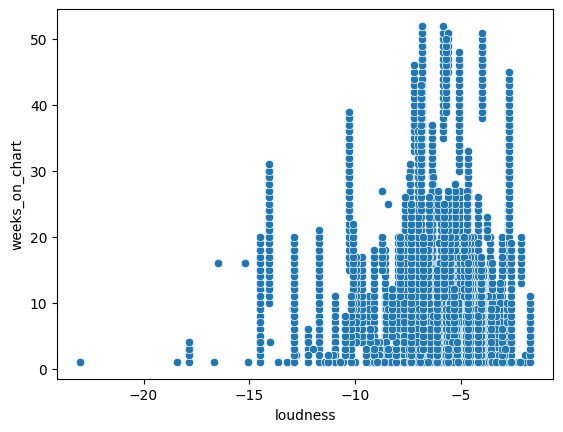

In [ ]:
sns.scatterplot(x = "loudness",y = "weeks_on_chart", data=merged_data[merged_data['year'].isin(["2019"])])

<Axes: xlabel='acousticness', ylabel='peak_position'>

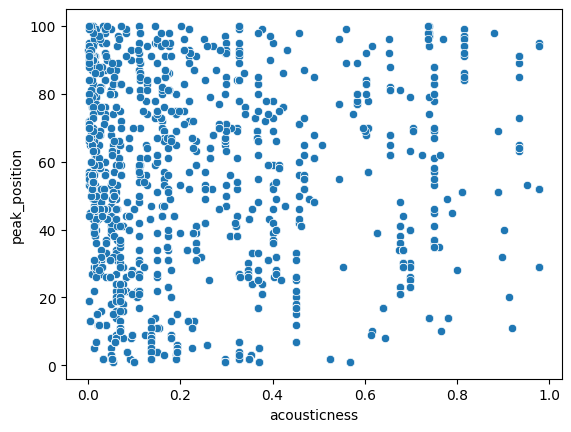

In [ ]:
sns.scatterplot(x = "acousticness",y = "peak_position", data=merged_data[merged_data['year'].isin(["2019"])])

<Axes: xlabel='danceability', ylabel='peak_position'>

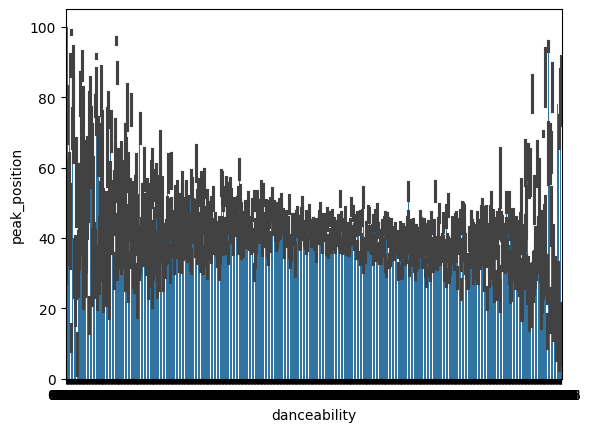

In [ ]:
sns.barplot(x="danceability",y="peak_position",data=merged_data)

In [ ]:
merged_data['performer'].head()

0    Lady Gaga
1    Lady Gaga
2    Lady Gaga
3    Lady Gaga
4    Lady Gaga
Name: performer, dtype: object

In [ ]:
merged_data = merged_data.replace("$", "s")

In [ ]:
merged_data['performer'].head()

0    Lady Gaga
1    Lady Gaga
2    Lady Gaga
3    Lady Gaga
4    Lady Gaga
Name: performer, dtype: object

In [ ]:
merged_data.query('performer== "Pitbull Featuring Trina & Young Boss"')['performer']

Series([], Name: performer, dtype: object)

In [ ]:
merged_data.sort_values('weeks_on_chart', ascending = False)

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
248965,http://www.billboard.com/charts/hot-100/2014-0...,2014-05-10,49,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,48.0,3,87,...,-3.686,True,0.0627,0.106000,0.000108,0.6680,0.236,136.245,4.0,2014
248964,http://www.billboard.com/charts/hot-100/2014-0...,2014-05-03,48,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,42.0,3,86,...,-3.686,True,0.0627,0.106000,0.000108,0.6680,0.236,136.245,4.0,2014
248963,http://www.billboard.com/charts/hot-100/2014-0...,2014-04-26,42,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,39.0,3,85,...,-3.686,True,0.0627,0.106000,0.000108,0.6680,0.236,136.245,4.0,2014
248962,http://www.billboard.com/charts/hot-100/2014-0...,2014-04-19,39,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,37.0,3,84,...,-3.686,True,0.0627,0.106000,0.000108,0.6680,0.236,136.245,4.0,2014
248961,http://www.billboard.com/charts/hot-100/2014-0...,2014-04-12,37,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,2,33.0,3,83,...,-3.686,True,0.0627,0.106000,0.000108,0.6680,0.236,136.245,4.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62320,http://www.billboard.com/charts/hot-100/1959-1...,1959-10-10,97,Dance With Me,The Drifters,Dance With MeThe Drifters,1,NaN,97,1,...,-8.119,True,0.0296,0.351000,0.000000,0.1540,0.537,131.348,4.0,1959
25498,http://www.billboard.com/charts/hot-100/1974-0...,1974-09-07,91,I'm A Ramblin' Man,Waylon Jennings,I'm A Ramblin' ManWaylon Jennings,1,NaN,91,1,...,-11.654,True,0.0319,0.333000,0.003440,0.0931,0.768,109.438,4.0,1974
244844,http://www.billboard.com/charts/hot-100/1970-0...,1970-03-28,90,Capture The Moment,Jay & The Americans,Capture The MomentJay & The Americans,1,NaN,90,1,...,-10.174,True,0.3370,0.000078,0.962000,0.0880,0.257,127.143,4.0,1970
62294,http://www.billboard.com/charts/hot-100/2015-0...,2015-02-07,94,Somebody,Natalie La Rose Featuring Jeremih,SomebodyNatalie La Rose Featuring Jeremih,1,NaN,94,1,...,-8.714,True,0.0376,0.000792,0.000013,0.0656,0.735,104.990,4.0,2015
